![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Open DataFrame highlighting production budget and worldwide gross revenue
b_and_p = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
# Convert string columns to integers and date-time columns
# Strip dollar signs and commas from integers
b_and_p['worldwide_gross'] = b_and_p['worldwide_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['production_budget'] = b_and_p['production_budget'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['domestic_gross'] = b_and_p['domestic_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['release_date'] = pd.to_datetime(b_and_p['release_date'])
b_and_p.dropna(subset=['production_budget', 'worldwide_gross'])
b_and_p.at[5189, 'movie'] = "God's Not Dead"
b_and_p.at[2996, 'movie'] = "The King's Speech"

In [4]:
# Filter by movies that grossed at least $1M worldwide and were made in the last 20 years
# Create a gross profit margin column and sort by it
b_and_p = b_and_p[b_and_p['worldwide_gross'] >= 1000000]
b_and_p = b_and_p[b_and_p['release_date'].dt.year >= 1999]
b_and_p['profit_margin_percent'] = (b_and_p['worldwide_gross'] - b_and_p['production_budget']) / b_and_p['worldwide_gross'] * 100
b_and_p['gross_margin_percent'] = b_and_p['worldwide_gross'] / b_and_p['production_budget'] * 100
b_and_p = b_and_p.sort_values(by=['gross_margin_percent'], ascending=False).reset_index(drop=True)

In [5]:
# Create a Top 50 list and hardcode genre for each movie
pd.options.mode.chained_assignment = None
top_50 = b_and_p.iloc[:50]
top_50['genre'] = ['Horror', 'Horror', 'Horror', 'Documentary', 'Musical', 'Comedy', 'Thriller',
                    'Christian', 'Horror', 'Documentary', 'Horror', 'Comedy', 'Christian',
                    'Horror', 'Horror', 'Horror', 'Thriller', 'Christian', 'Documentary', 'Horror',
                    'Romance', 'Foreign', 'Drama', 'Horror', 'Horror', 'Foreign', 'Horror',
                    'Documentary', 'Horror', 'Documentary', 'Comedy', 'Horror', 'Foreign', 'Horror',
                    'Foreign', 'Horror', 'Horror', 'Drama', 'Horror', 'Drama', 'Horror', 'Drama',
                    'Drama', 'Horror', 'Horror', 'Horror', 'Documentary', 'Comedy', 'Drama',
                    'Horror']

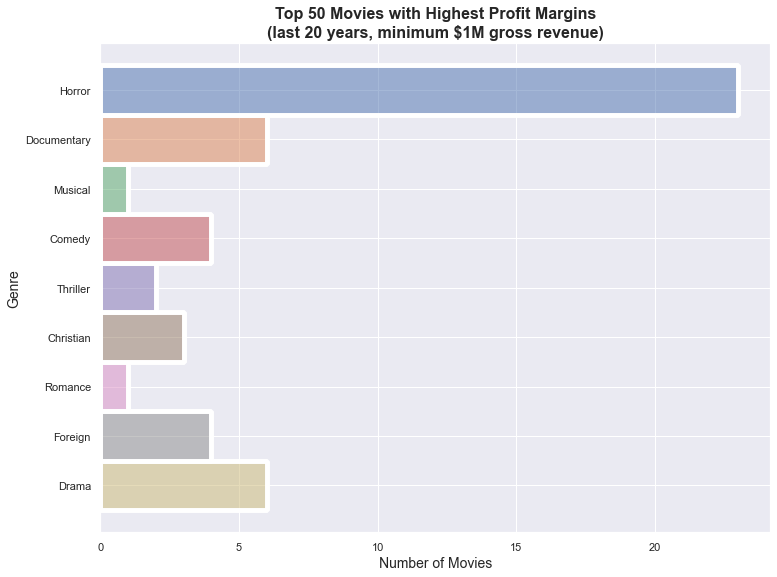

In [12]:
# Plot histogram highlighting Top 50 movies w/ highest GM by genre
genre_hist = sns.histplot(data=top_50, y='genre', hue="genre", legend=False)
sns.set(rc={'figure.figsize':(12,9)})
plt.xlabel('Number of Movies', size=14)
plt.ylabel('Genre', size=14)
plt.title('Top 50 Movies with Highest Profit Margins\n(last 20 years, minimum $1M gross revenue)',
         size=16, weight=900);

In [7]:
# Filter tables by genre, create averages for budget, revenue & ROI

genre_data = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
gross_genre_merge = b_and_p.merge(genre_data, left_on=['movie'], right_on=['primary_title'])
gross_genre_merge['genres'] = gross_genre_merge['genres'].str.replace(',', '')

horror_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("orro")==True]
horror_genre = horror_genre.drop_duplicates(subset=['movie'])
horror_budg = horror_genre['production_budget'].mean()
horror_rev = horror_genre['worldwide_gross'].mean()

drama_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("rama")==True]
drama_genre = drama_genre.drop_duplicates(subset=['movie'])
drama_budg = drama_genre['production_budget'].mean()
drama_rev = drama_genre['worldwide_gross'].mean()

comedy_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("omedy")==True]
comedy_genre = comedy_genre.drop_duplicates(subset=['movie'])
comedy_budg = comedy_genre['production_budget'].mean()
comedy_rev = comedy_genre['worldwide_gross'].mean()

action_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("ction")==True]
action_genre = action_genre.drop_duplicates(subset=['movie'])
action_budg = action_genre['production_budget'].mean()
action_rev = action_genre['worldwide_gross'].mean()

horror_roi = ((horror_rev - horror_budg) / horror_budg) * 100
drama_roi = ((drama_rev - drama_budg) / drama_budg) * 100
comedy_roi = ((comedy_rev - comedy_budg) / comedy_budg) * 100
action_roi = ((action_rev - action_budg) / action_budg) * 100

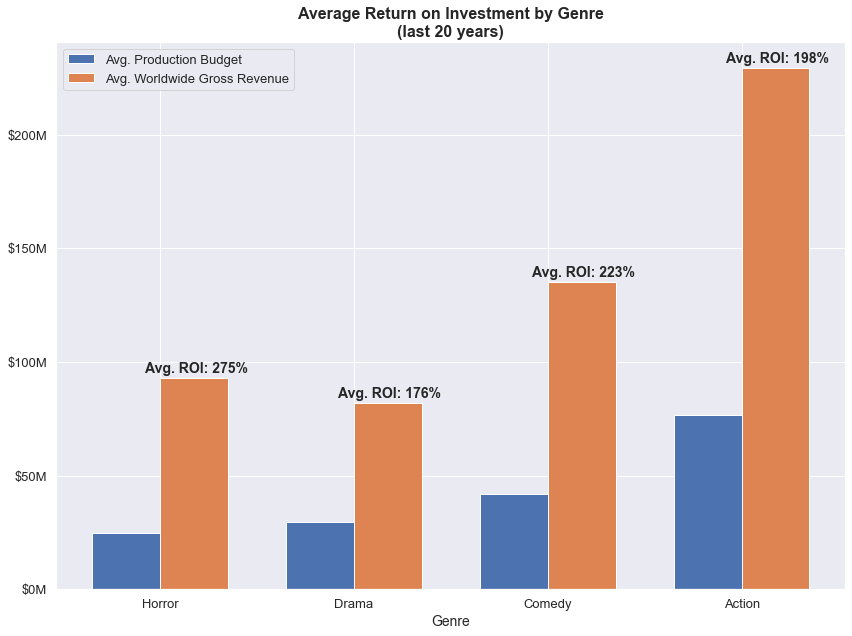

In [15]:
# Plot bar graph with avg. budget, revenue and ROI by genre

from matplotlib.ticker import FuncFormatter

labels = ['Horror', 'Drama', 'Comedy', 'Action']
prod_budg = [horror_budg, drama_budg, comedy_budg, action_budg]
revs = [horror_rev, drama_rev, comedy_rev, action_rev]
horror_roi = 'Avg. ROI: 275%'
comedy_roi = 'Avg. ROI: 223%'
drama_roi = 'Avg. ROI: 176%'
action_roi = 'Avg. ROI: 198%'

x = np.arange(len(labels))
width = 0.35
y = np.arange(4)
def millions(x, pos):
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

cost_rev, ax = plt.subplots()
rects1 = ax.bar(x - width/2, prod_budg, width, label='Avg. Production Budget')
rects2 = ax.bar(x + width/2, revs, width, label='Avg. Worldwide Gross Revenue')

ax.set_xlabel('Genre', size=14)
ax.set_title('Average Return on Investment by Genre\n(last 20 years)', size=16, weight=900)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=13)
ax.legend()
plt.rc('legend', fontsize=13)
ax.yaxis.set_major_formatter(formatter)
plt.yticks(fontsize=13)

plt.figtext(0.174, 0.415, horror_roi, fontsize=14, weight="bold")
plt.figtext(0.398, 0.377, drama_roi, fontsize=14, weight="bold")
plt.figtext(0.622, 0.563, comedy_roi, fontsize=14, weight="bold")
plt.figtext(0.847, 0.894, action_roi, fontsize=14, weight="bold")

cost_rev.tight_layout();

In [9]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [10]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***